In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
plt.style.use('ggplot')

In [73]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [20, 8]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
plt.rc('font', size=8)                     ## 
plt.rc('axes', titlesize=16)               ## 
plt.rc('axes', labelsize=14)               ##
plt.rc('xtick', labelsize=10)              ##
plt.rc('ytick', labelsize=10)              ##
plt.rc('legend', fontsize=10)              ##
plt.rc('figure', titlesize=12)             ## 
#############################################

In [5]:
path = Path('../../datasets/Ch12/')

In [50]:
stores = pd.read_csv(path.joinpath('rossmann-store.csv'))
store_train = pd.read_csv(path.joinpath('store-train.csv'), index_col='Date', parse_dates=['Date'], infer_datetime_format=True, low_memory=False)
store_test = pd.read_csv(path.joinpath('store-test.csv'))

In [39]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [51]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [41]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [79]:
store_train.isna().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [86]:
store_train = store_train[store_train['Sales'] > 0]

<AxesSubplot:xlabel='Date,Store'>

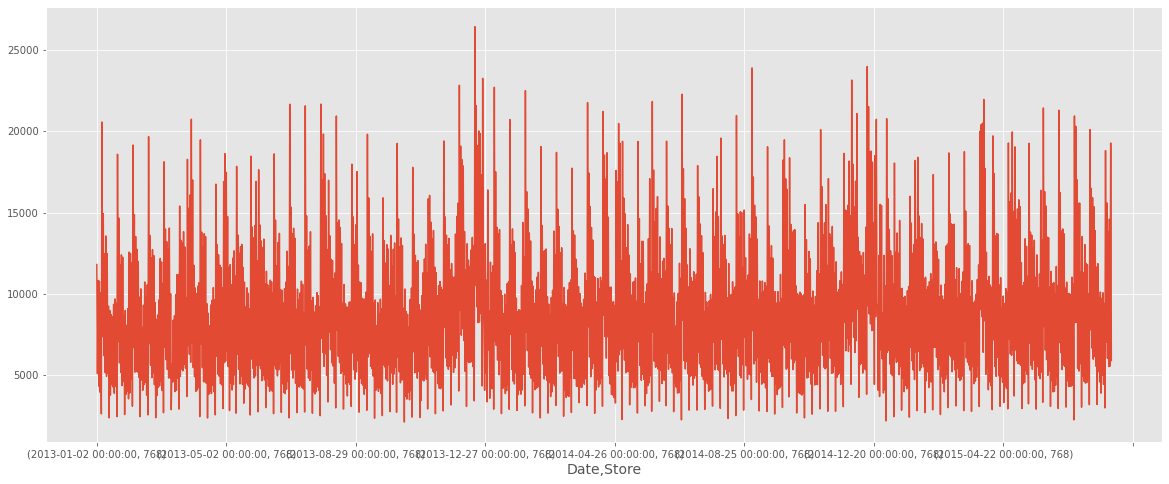

In [87]:
store_train[store_train['Store'].isin([768,1106 ])].groupby(['Date', 'Store']).sum()['Sales'].plot()

/var/folders/zl/3lwtbzg10nqdl611crrtmpcr0000gn/T/ipykernel_11884/2184229330.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  store_train[store_train['Store'] == s].loc['2015-01':'2015-03']['Sales'].plot(figsize=(18, 12))
/var/folders/zl/3lwtbzg10nqdl611crrtmpcr0000gn/T/ipykernel_11884/2184229330.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  store_train[store_train['Store'] == s].loc['2015-01':'2015-03']['Sales'].plot(figsize=(18, 12))
/var/folders/zl/3lwtbzg10nqdl611crrtmpcr0000gn/T/ipykernel_11884/2184229330.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  store_train[store_train['Store'] == s].loc['2015-01':'2015-03']['Sales'].plo

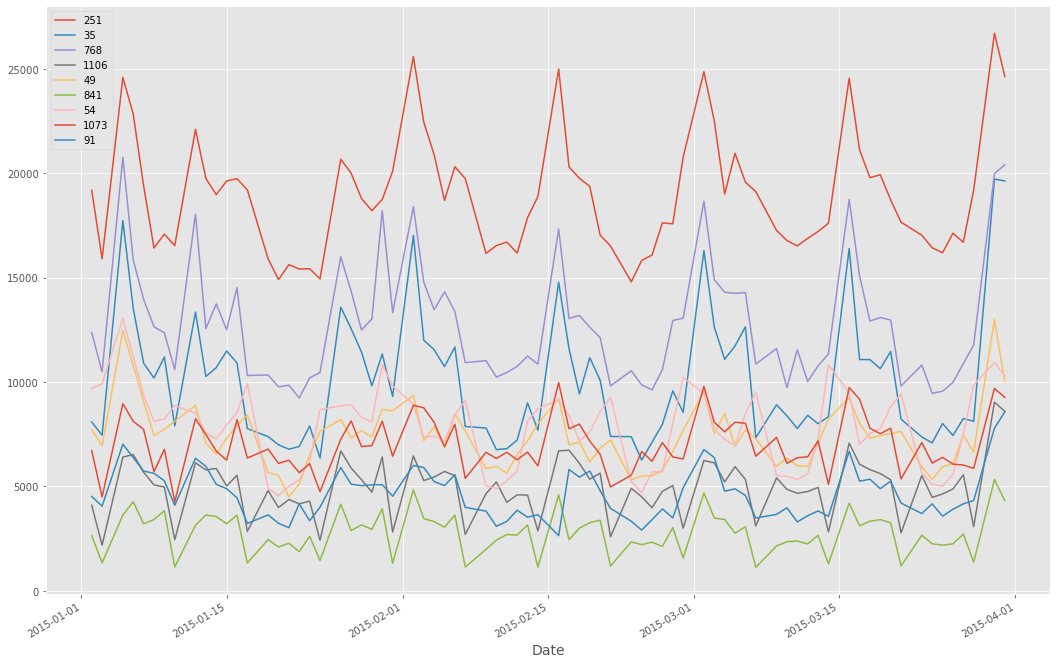

In [93]:
stores_no = [251, 35, 768, 1106, 49, 841, 54, 1073, 91]
for s in stores_no:
    store_train[store_train['Store'] == s].loc['2015-01':'2015-03']['Sales'].plot(figsize=(18, 12))
    # store_train[store_train['Store'] == 1106].loc['2015-01':'2015-03']['Sales'].plot()
    # store_train[store_train['Store'] == 49].loc['2015-01':'2015-03']['Sales'].plot()
    # store_train[store_train['Store'] == 841].loc['2015-01':'2015-03']['Sales'].plot()
plt.legend(stores_no)

<AxesSubplot:xlabel='Date'>

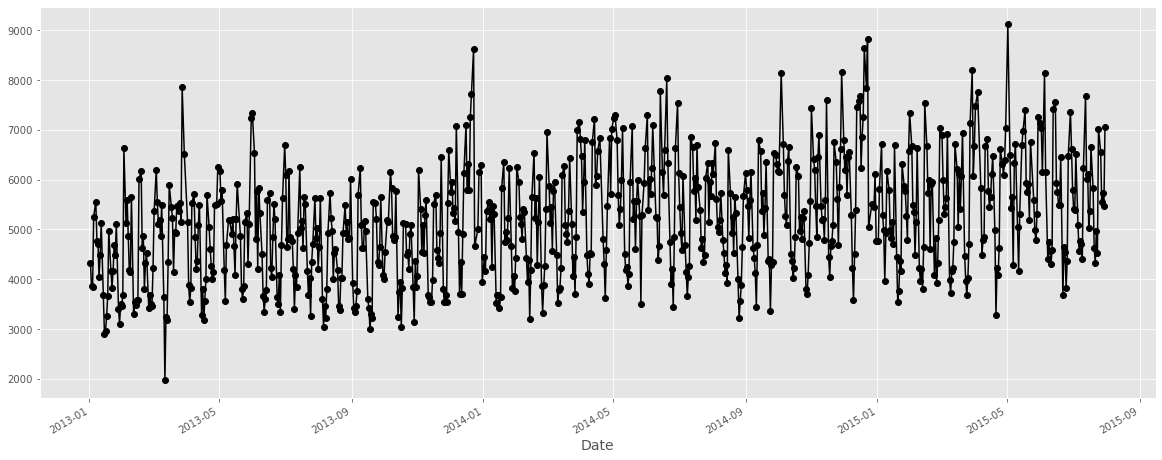

In [98]:
store_train[store_train['Store'] == 285]['Sales'].plot(style='k-o')

In [99]:
store_train['SalesLog'] = np.log(store_train['Sales'])

<AxesSubplot:xlabel='Date'>

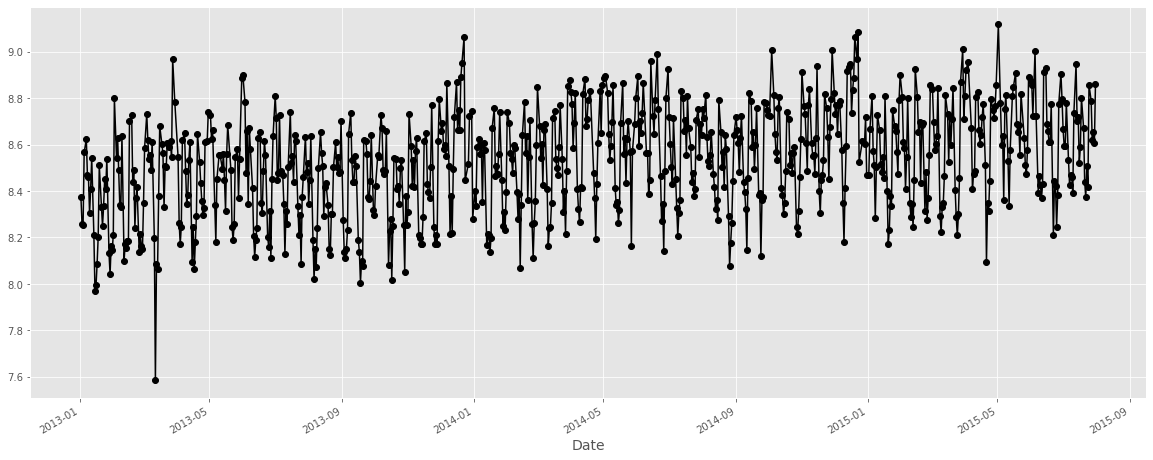

In [100]:
store_train[store_train['Store'] == 285]['SalesLog'].plot(style='k-o')